# Calculating EFP values

In [20]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import functions.eddy_feedback as ef
import scipy as sp

### Calculate NON-regridded EFP values

In [21]:
# path = '/home/links/ct715/data_storage/PAMIP/processed_monthly/efp_pd_non-regridded'
# files = os.listdir(path)
# files = [f for f in files if f.endswith('.nc')]
# files.sort()
# model_list = [os.path.basename(f).split('_')[0] for f in files]
# model_list.remove('E3SMv1')
# model_list.remove('ECHAM6.3')

# ds = {}
# for model in model_list:
#     dataset = xr.open_mfdataset(os.path.join(path, f'{model}_*.nc'))
#     ds[model] = dataset
    


# efp_data = []
# for model in model_list:
#     dataset = ds[model]
#     efp_nh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=False, slice_500hPa=True)
#     efp_sh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=True, slice_500hPa=True)
    
#     efp_data.append({'model': model, 'efp_nh': efp_nh, 'efp_sh': efp_sh})

# efp_df = pd.DataFrame(efp_data)
# efp_df.to_csv(f'./data/500hPa_efp_{len(model_list)}models.csv')

In [22]:
df = pd.read_csv('./data/500hPa_efp_13models.csv', index_col=0)
df

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1627,0.0400
1,CESM2,0.3420,0.3365
2,CNRM-CM6-1,0.2338,0.1762
3,CanESM5,0.4382,0.4312
4,EC-EARTH3,0.2717,0.2628
5,FGOALS-f3-L,0.1805,0.0838
6,HadGEM3-GC31-LL,0.2240,0.2926
7,HadGEM3-GC31-MM,0.2931,0.2793
8,IPSL-CM6A-LR,0.2515,0.1353
9,MIROC6,0.2536,0.2868


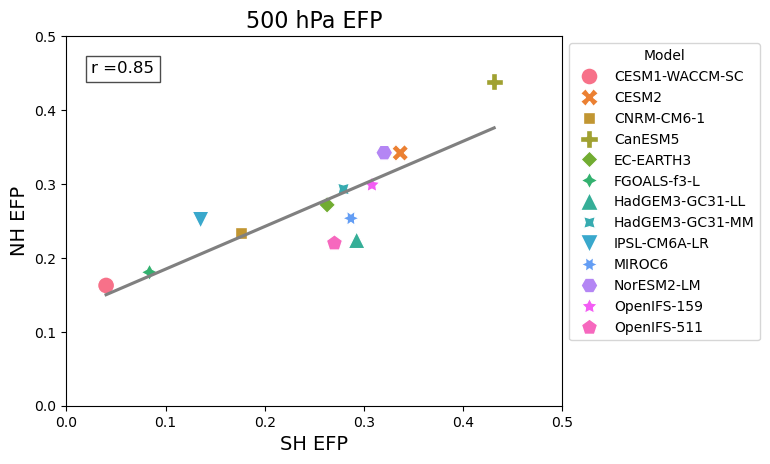

In [23]:
sns.regplot(data=df, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, x='efp_sh', y='efp_nh', hue='model', style='model', s=150)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['efp_nh'], y=df['efp_sh'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

plt.ylabel('NH EFP', fontsize=14)
plt.xlabel('SH EFP', fontsize=14)
plt.title('500 hPa EFP', fontsize=16)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.legend(bbox_to_anchor=(1,1), title='Model')
# plt.savefig('./plots/500hPa_efp_NH_vs_SH.png')
plt.show()